In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def simple_regression(X,y):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    # Fit
    regr.fit(X, y)
    # Calibration/Parameter des Regressionsmodel einstellen/in die Unsicherheitsmarge zwingen
    y_c = regr.predict(X)
    # Cross-validation
    y_cv = cross_val_predict(regr, X, y)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    return(y_cv, score_c, score_cv, mse_c, mse_cv)

In [3]:
def pcr(X,y, pc):
    ''' Step 1: PCA on input data'''
    # Define the PCA object
    pca = PCA()
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    Xstd = StandardScaler().fit_transform(X)
    # Run PCA producing the reduced variable Xreg and select the first pc components
    Xreg = pca.fit_transform(Xstd)[:,:pc]
    ''' Step 2: regression on selected principal components'''
    y_cv, score_c, score_cv, mse_c, mse_cv = simple_regression(Xreg, y)
    return(y_cv, score_c, score_cv, mse_c, mse_cv)


    
    Xreg2 = pca.fit_transform(Xstd)[:,:pc]
    [:5] = 1,2,3,4,5
    #Maximum Principal Components are 6
    #Minimum Principal Components are 3
    
    pc = range(0,npc,1)
    for i in pc:
        
    

In [4]:
# führt PCR für Komponentenanzahlen 1 bis 15 aus, RMSEC, RMSECV zum Quantfizieren der Resultate
# Nachteil dieser Methode: Es werden immer die Komponenten gewählt die den größten Unterschied im Datensatz ausmachen(allgemein),
# allerdings wird hier nicht festgestellt welche Hauptkompontenten den größten Unterschied in Kaufpreisen ausmachen.

def optimale_Komponenten_anzahl(data,features):
    X = data.loc[:, features].values
    y = data['kaufpreis']
    npc = 15 # maximum number of principal components
    pc = range(1,npc+1,1)
    # Define arrays for R^2 and MSE
    r2c = np.zeros(npc)
    r2cv = np.zeros(npc)
    msec = np.zeros(npc)
    msecv = np.zeros(npc)
    for i in pc:
        predicted, r2c[i-1], r2cv[i-1], msec[i-1], msecv[i-1] = pcr(X,y, pc=i)
        with plt.style.context(('ggplot')):
            plt.plot(pc, np.sqrt(msecv[:]), 'r', label = "RMSECV(Mögl. Performance der Kalibration)")
            plt.plot(pc, np.sqrt(msec[:]), 'b', label = "RMSEC(Qualität der Kalibration)")
            plt.xlabel("# Principal Components")
            plt.ylabel("RMSE")
            plt.title("Conventional PCR")
            plt.legend()
        plt.show()
    return X,y

In [5]:
def grafik_zeichnen(X,y,amountPC):
    predicted, r2r, r2cv, mser, mscv = pcr(X,y, pc=amountPC)
    # Regression plot
    z = np.polyfit(y, predicted, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y, predicted, c='red', edgecolors='k')
        ax.plot(y, z[1]+z[0]*y, c='blue', linewidth=1)
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('PCR -- $R^2$ (CV): {0:.2f}'.format(r2cv))
        plt.xlabel('Gemessener $^{\circ}$Kaufpreis')
        plt.ylabel('Geschätzter $^{\circ}$Kaufpreis')
        plt.show()

In [6]:
features_lu = ['Distanz','fläche_m2','schlafzimmer','badezimmer','parkplätze','Haus']
features_fr = ['baujahr','fläche_m2','parkplätze','badezimmer','Haus']
features_be = ['fläche_m2','badezimmer','Haus']
features_de = ['baujahr','DistanzKöln','DistanzLuxemburg','fläche_m2','badezimmer']


data_lu = pd.read_csv("Luxembourg_new.csv")
data_de = pd.read_csv("Deutschland_new.csv")
data_be = pd.read_csv("Belgien_new.csv")
data_fr = pd.read_csv("Frankreich_new.csv")

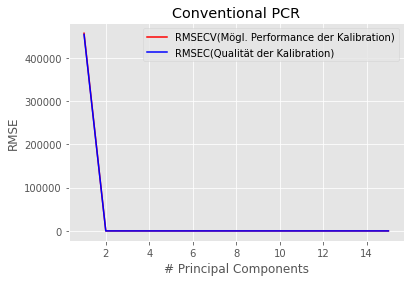

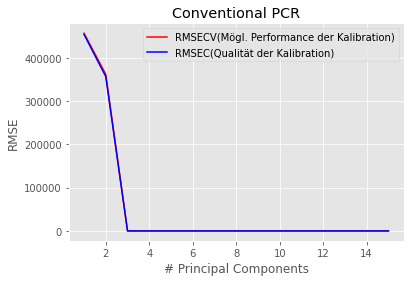

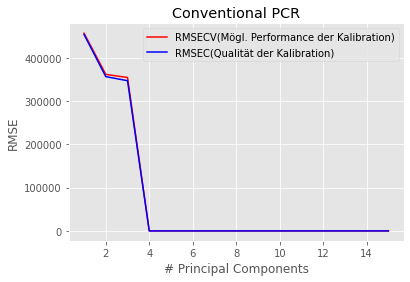

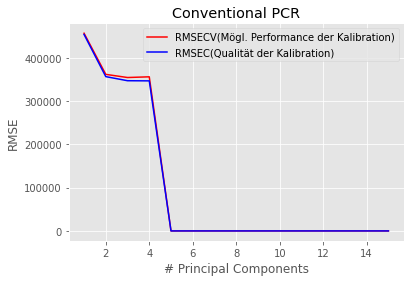

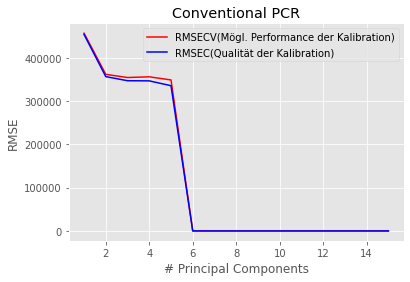

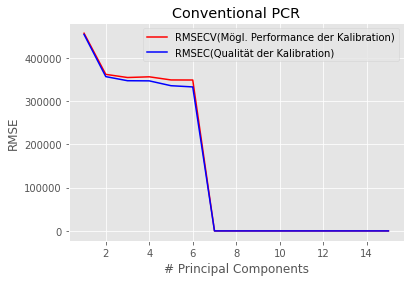

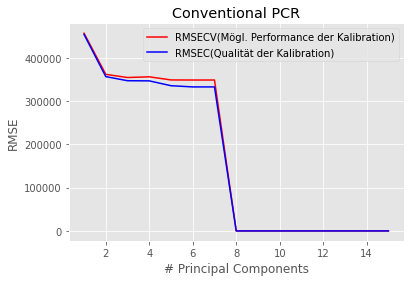

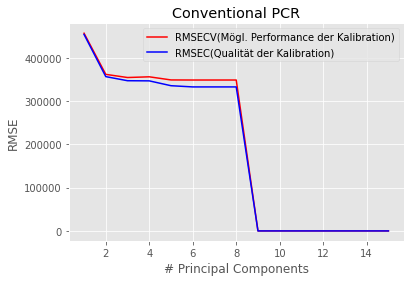

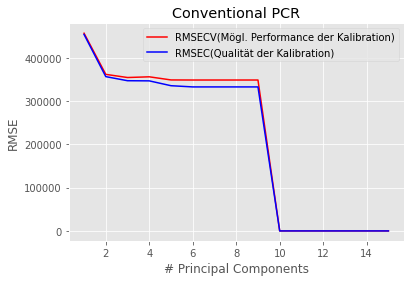

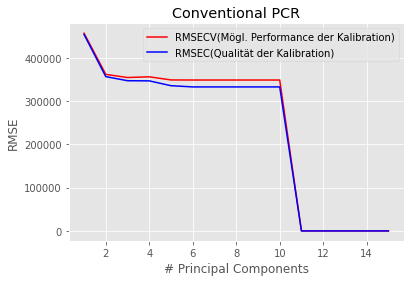

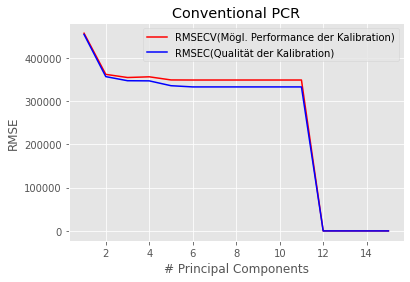

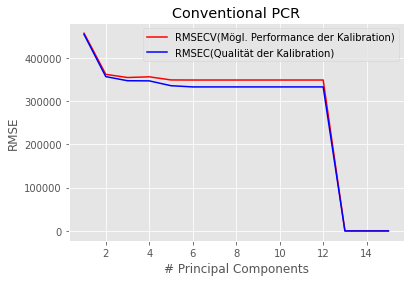

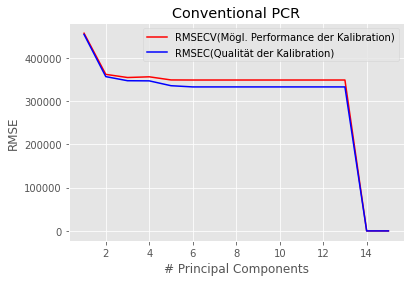

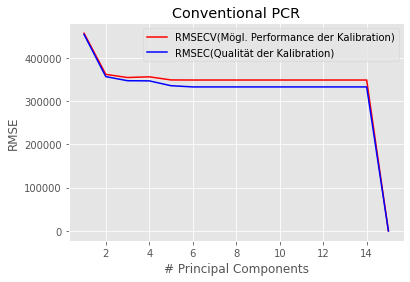

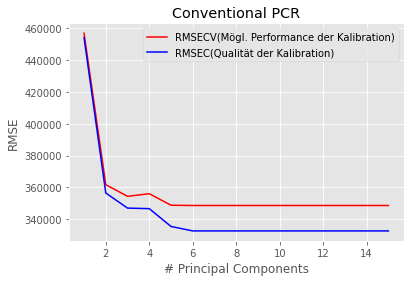

In [7]:
X,y = optimale_Komponenten_anzahl(data_lu,features_lu)

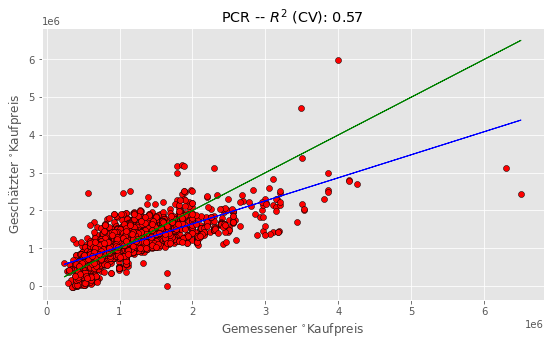

In [8]:
grafik_zeichnen(X,y,5)

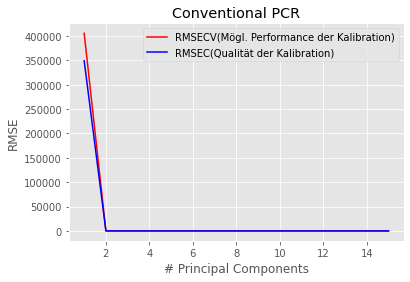

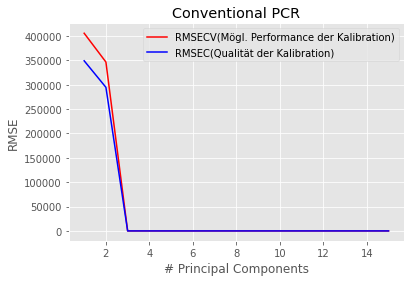

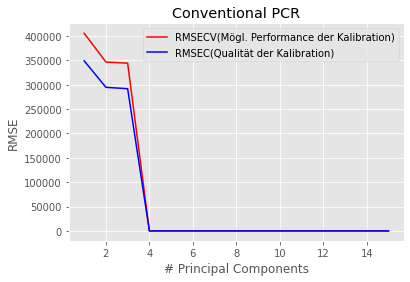

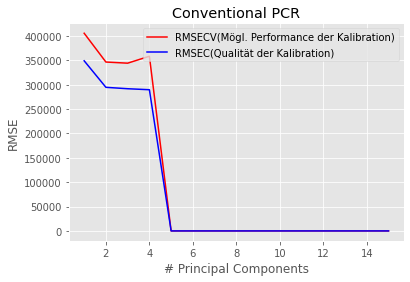

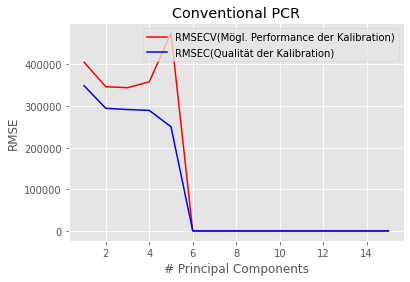

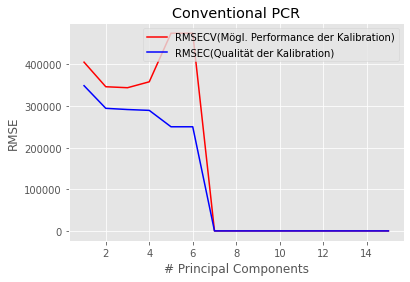

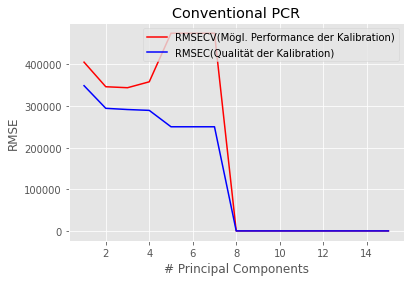

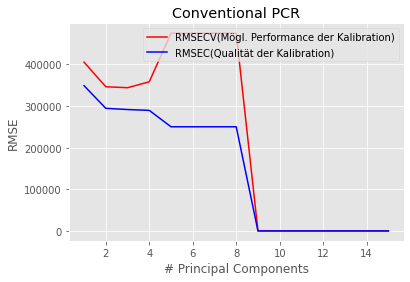

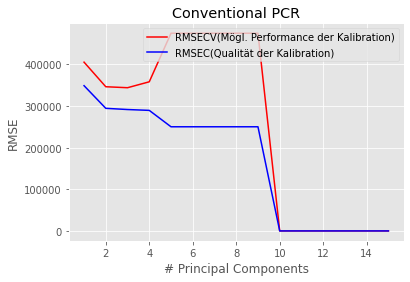

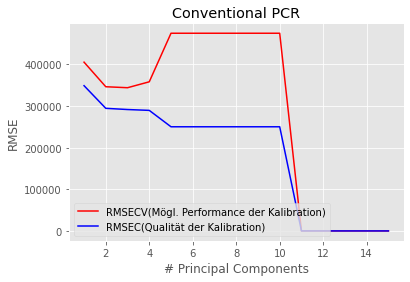

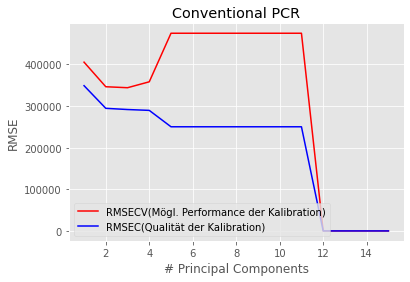

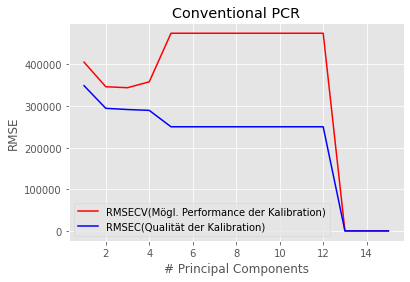

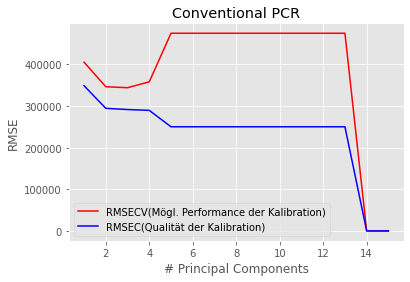

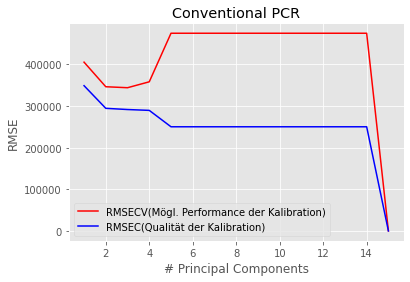

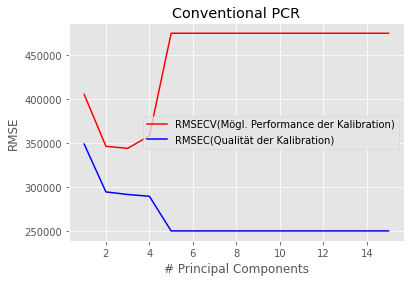

In [9]:
X,y = optimale_Komponenten_anzahl(data_de,features_de)

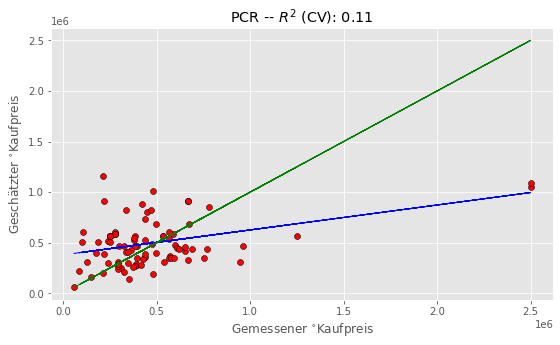

In [10]:
grafik_zeichnen(X,y,3)

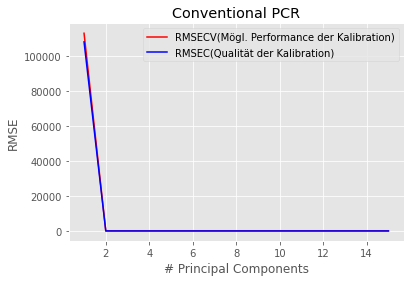

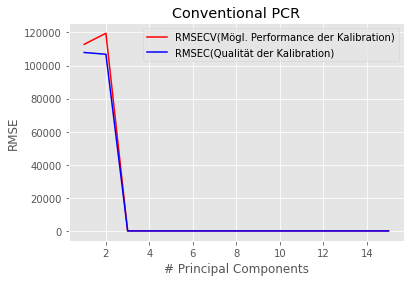

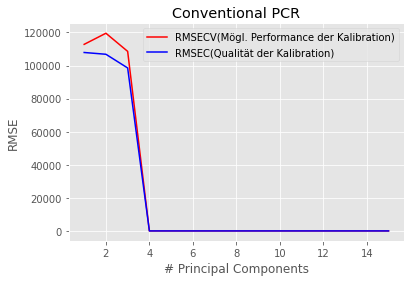

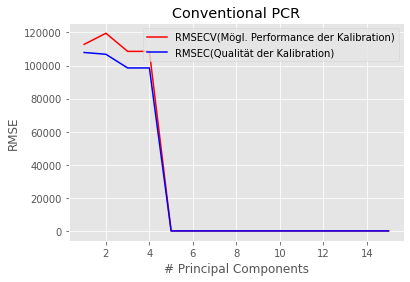

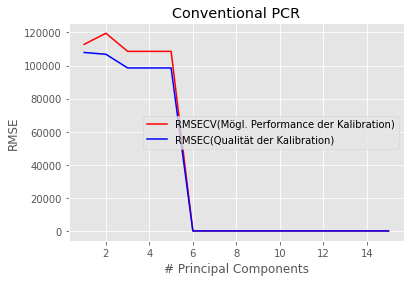

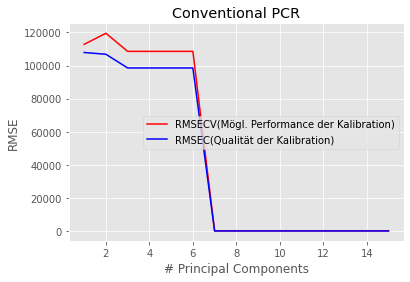

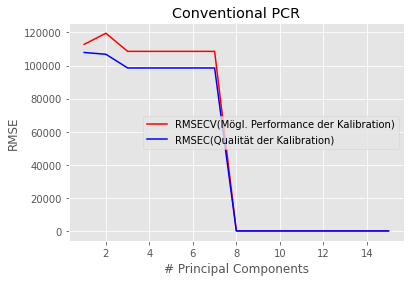

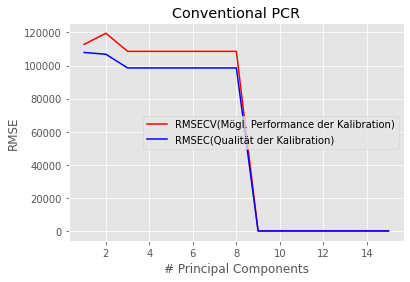

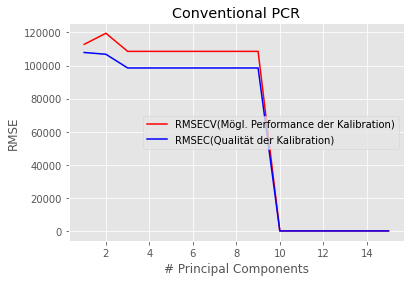

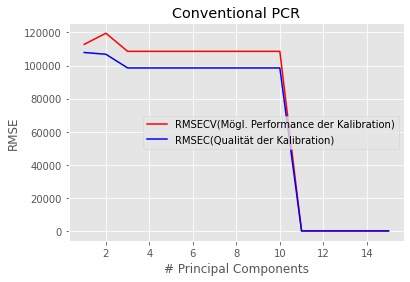

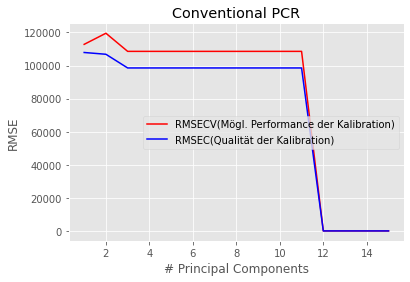

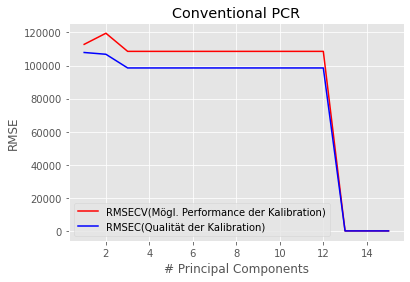

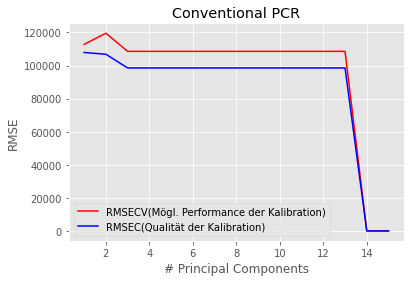

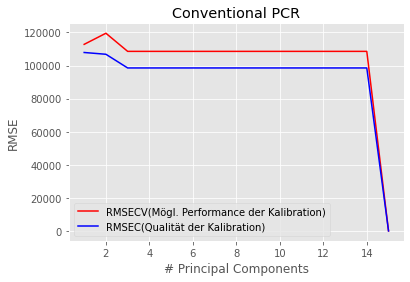

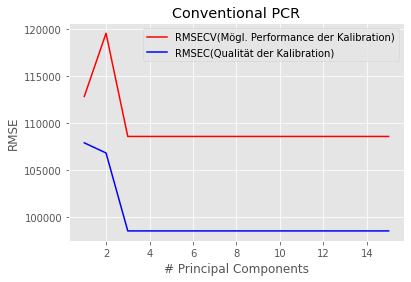

In [11]:
X,y = optimale_Komponenten_anzahl(data_be,features_be)

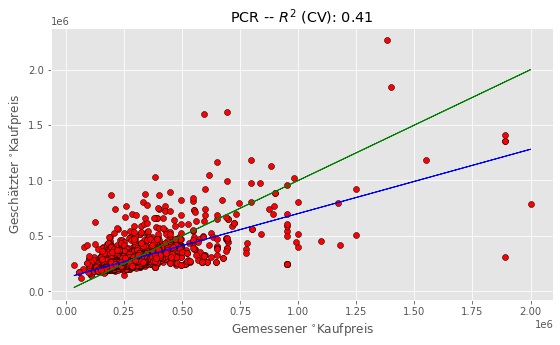

In [12]:
grafik_zeichnen(X,y,3)

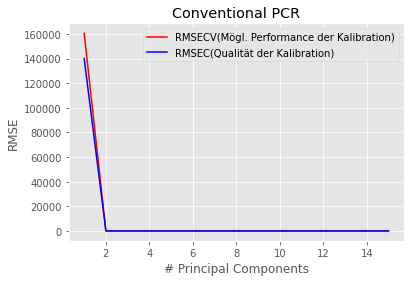

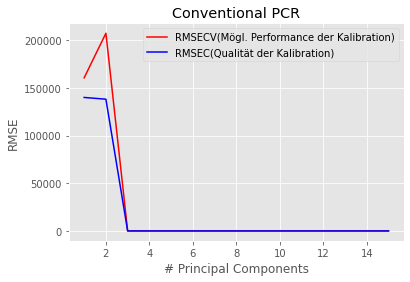

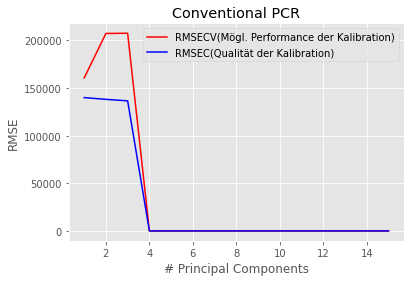

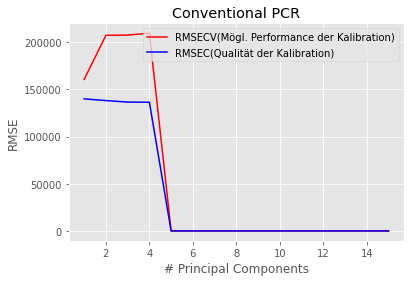

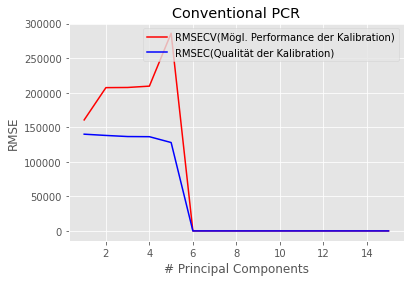

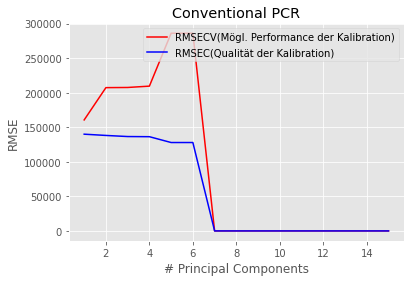

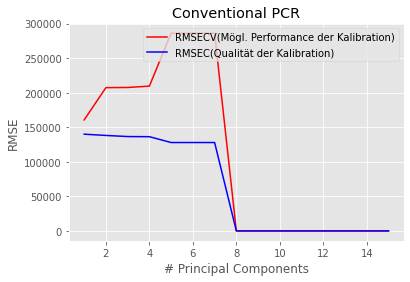

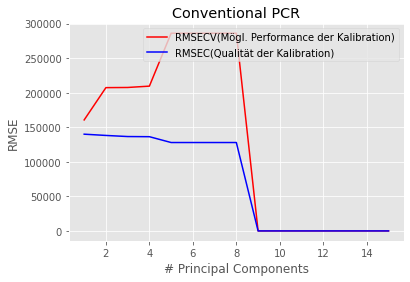

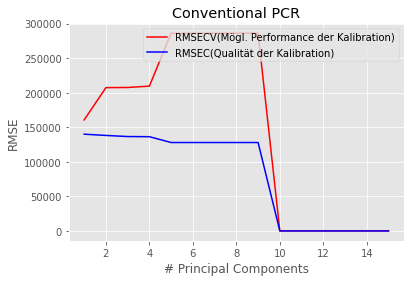

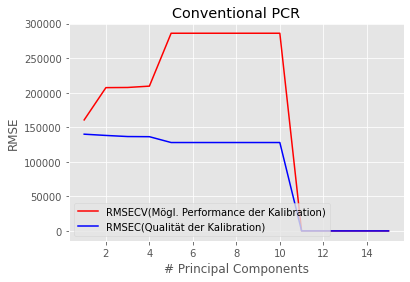

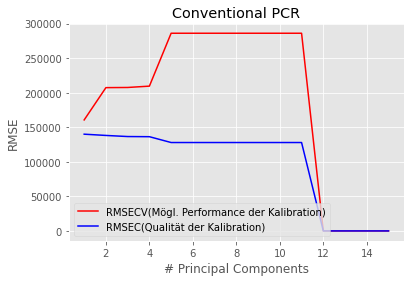

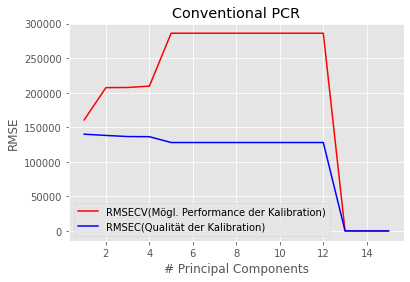

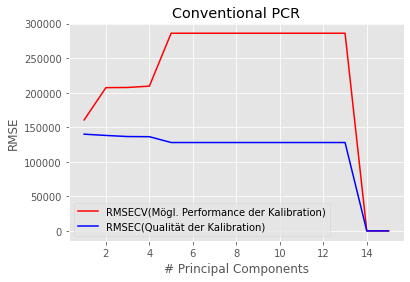

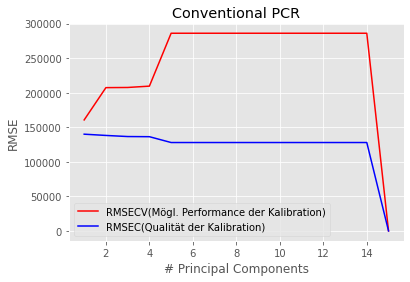

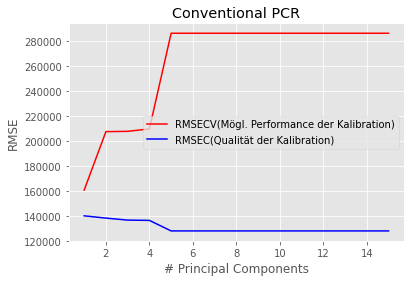

In [13]:
X,y = optimale_Komponenten_anzahl(data_fr,features_fr)

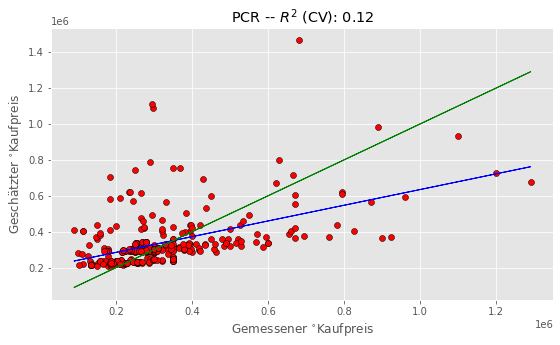

In [16]:
grafik_zeichnen(X,y,1)